In [2]:
import tensorflow as tf
import zipfile
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
from keras.preprocessing import image
import matplotlib.image as mpimg
from keras.callbacks import ReduceLROnPlateau

In [3]:
train_dir = "./rps-cv-images/"

train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=20,
                horizontal_flip=True,
                shear_range = 0.2,
                fill_mode = 'nearest',
                validation_split=0.4)

validation_datagen = ImageDataGenerator(rescale = 1.0/255,
                                        validation_split=0.4)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(100,150),
        batch_size=32,
        class_mode='categorical',
        subset='training')
 
validation_generator = validation_datagen.flow_from_directory(
        train_dir, 
        target_size=(100,150), 
        batch_size=32,
        class_mode='categorical',
        subset='validation')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(100, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [5]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [7]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=2,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.000003)

In [8]:
history = model.fit(
    train_generator,  
    epochs=10,
    validation_data=validation_generator,
    callbacks=[learning_rate_reduction]
)


Epoch 1/10
42/42 [==============================] - 7s 135ms/step - loss: 1.0733 - accuracy: 0.4011 - val_loss: 0.9448 - val_accuracy: 0.7460 - lr: 0.0010
Epoch 2/10
42/42 [==============================] - 6s 131ms/step - loss: 0.8300 - accuracy: 0.6362 - val_loss: 0.7018 - val_accuracy: 0.8043 - lr: 0.0010
Epoch 3/10
42/42 [==============================] - 6s 135ms/step - loss: 0.6229 - accuracy: 0.7641 - val_loss: 0.5357 - val_accuracy: 0.7986 - lr: 0.0010
Epoch 4/10
42/42 [==============================] - 8s 182ms/step - loss: 0.4539 - accuracy: 0.8257 - val_loss: 0.3202 - val_accuracy: 0.9233 - lr: 0.0010
Epoch 5/10
42/42 [==============================] - 8s 192ms/step - loss: 0.3940 - accuracy: 0.8470 - val_loss: 0.2544 - val_accuracy: 0.9314 - lr: 0.0010
Epoch 6/10
42/42 [==============================] - 6s 131ms/step - loss: 0.3082 - accuracy: 0.8858 - val_loss: 0.2562 - val_accuracy: 0.9142 - lr: 0.0010
Epoch 7/10
42/42 [==============================] - ETA: 0s - loss: 0.

In [9]:
# function for plotting accuracy and loss

def eval_plot(history):

  plt.figure(figsize=(14, 5))

  # Accuracy plot
  plt.subplot(1, 2, 1)
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  epochs = range(len(acc))
  acc_plot, = plt.plot(epochs, acc, 'r')
  val_acc_plot, = plt.plot(epochs, val_acc, 'b')
  plt.title('Training and Validation Accuracy')
  plt.legend([acc_plot, val_acc_plot], ['Training Accuracy', 'Validation Accuracy'])

  # Loss plot
  plt.subplot(1, 2, 2)
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(loss))
  loss_plot, = plt.plot(epochs, loss, 'r')
  val_loss_plot, = plt.plot(epochs, val_loss, 'b')
  plt.title('Training and Validation Loss')
  plt.legend([loss_plot, val_loss_plot], ['Training Loss', 'Validation Loss'])

In [10]:
# function for model evaluation 

def evaluate(model):

  validation_generator = train_datagen.flow_from_directory(
          train_dir, 
          target_size=(100,150), 
          batch_size=32, 
          class_mode='categorical',
          shuffle = False,
          subset='validation')

  batch_size = 32
  num_of_train_samples = 1314
  num_of_test_samples = 874

  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)
  y_pred = np.argmax(Y_pred, axis=1)

  print('\nConfusion Matrix\n')
  print(confusion_matrix(validation_generator.classes, y_pred))


  print('\n\nClassification Report\n')
  target_names = ['Rock', 'Paper', 'Scissors']
  print(classification_report(validation_generator.classes, y_pred, target_names=target_names))

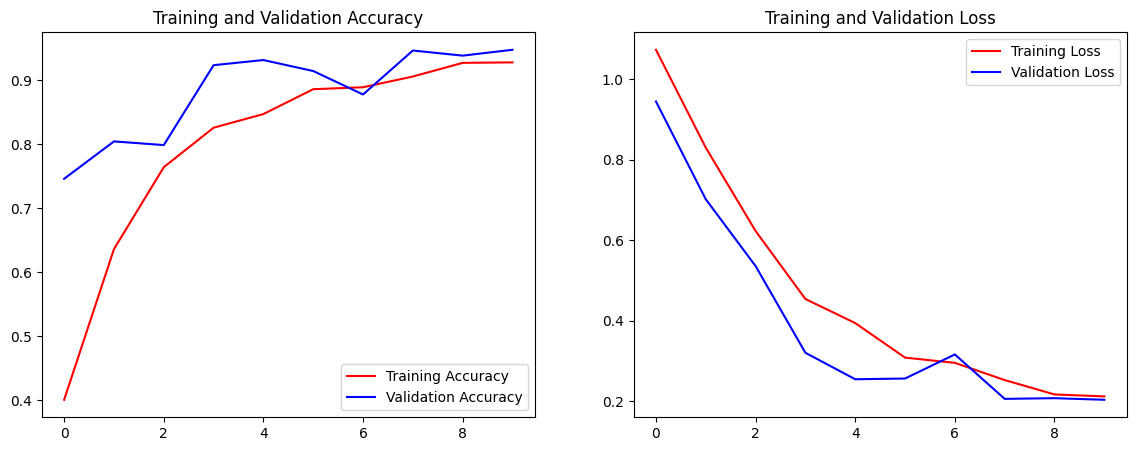

In [17]:
eval_plot(history)

In [11]:
evaluate(model)

Found 874 images belonging to 3 classes.


C:\Users\mrymf\AppData\Local\Temp\ipykernel_4668\1550550864.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)



Confusion Matrix

[[249   7  28]
 [  9 280   1]
 [  3   3 294]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.95      0.88      0.91       284
       Paper       0.97      0.97      0.97       290
    Scissors       0.91      0.98      0.94       300

    accuracy                           0.94       874
   macro avg       0.94      0.94      0.94       874
weighted avg       0.94      0.94      0.94       874



Transfer learning (using ResNet50)

In [12]:
base_model_resnet = tf.keras.applications.ResNet50V2(input_shape=(100, 150, 3),
                                               include_top=False,
                                               weights='imagenet')

94668760/94668760 [==============================] - 14s 0us/step


In [13]:
base_model_resnet.trainable = False

In [14]:
model_resnet = tf.keras.models.Sequential()
model_resnet.add(base_model_resnet)
model_resnet.add(tf.keras.layers.Flatten())
model_resnet.add(tf.keras.layers.Dropout(0.2))
model_resnet.add(tf.keras.layers.Dense(3, activation='softmax'))

In [15]:
model_resnet.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [16]:
history_resnet = model_resnet.fit(train_generator,
      epochs=10,
      validation_data = validation_generator,
      callbacks=[learning_rate_reduction]
      ) 

Epoch 1/10
42/42 [==============================] - 18s 385ms/step - loss: 0.2959 - accuracy: 0.9361 - val_loss: 0.1100 - val_accuracy: 0.9805 - lr: 0.0010
Epoch 2/10
42/42 [==============================] - 16s 378ms/step - loss: 0.0803 - accuracy: 0.9855 - val_loss: 0.0714 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 3/10
42/42 [==============================] - 16s 382ms/step - loss: 0.0489 - accuracy: 0.9909 - val_loss: 0.0607 - val_accuracy: 0.9908 - lr: 0.0010
Epoch 4/10
42/42 [==============================] - ETA: 0s - loss: 0.0508 - accuracy: 0.9916
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
42/42 [==============================] - 16s 392ms/step - loss: 0.0508 - accuracy: 0.9916 - val_loss: 0.0905 - val_accuracy: 0.9863 - lr: 0.0010
Epoch 5/10
42/42 [==============================] - 20s 487ms/step - loss: 0.0302 - accuracy: 0.9947 - val_loss: 0.0561 - val_accuracy: 0.9920 - lr: 5.0000e-04
Epoch 6/10
42/42 [==============================] - 18s 4

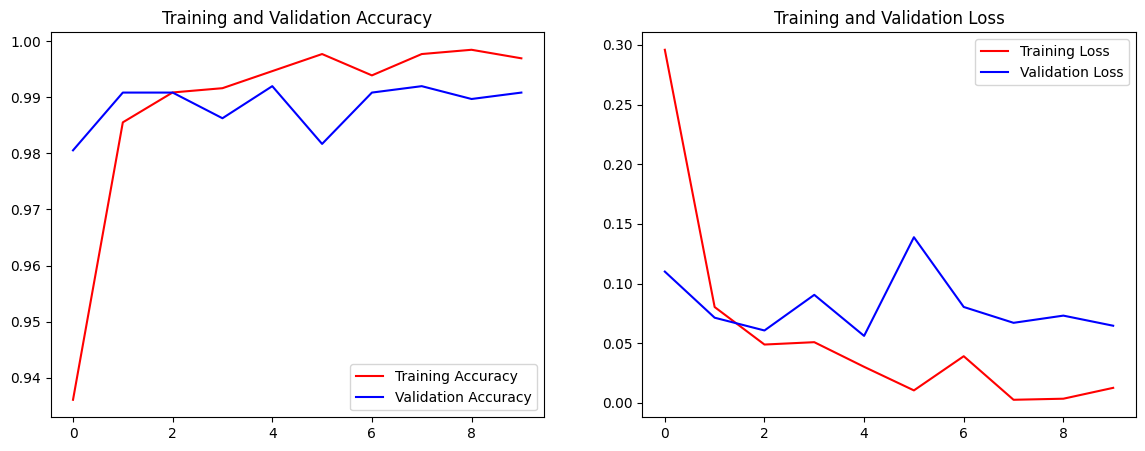

In [18]:
eval_plot(history_resnet)

In [19]:
evaluate(model_resnet)

Found 874 images belonging to 3 classes.


C:\Users\mrymf\AppData\Local\Temp\ipykernel_4668\1550550864.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)



Confusion Matrix

[[283   0   1]
 [  0 290   0]
 [  3   0 297]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.99      1.00      0.99       284
       Paper       1.00      1.00      1.00       290
    Scissors       1.00      0.99      0.99       300

    accuracy                           1.00       874
   macro avg       1.00      1.00      1.00       874
weighted avg       1.00      1.00      1.00       874



Transfer learning (using InceptionV3)

In [20]:
base_model_inception = tf.keras.applications.inception_v3.InceptionV3(input_shape = (100, 150, 3), include_top = False, weights = 'imagenet')

87910968/87910968 [==============================] - 22s 0us/step


In [21]:
for layer in base_model_inception.layers:
    layer.trainable = False

In [22]:
model_inception = tf.keras.models.Sequential()
model_inception.add(base_model_inception)
model_inception.add(tf.keras.layers.Flatten())
model_inception.add(tf.keras.layers.Dense(32, activation='relu'))
model_inception.add(tf.keras.layers.Dropout(0.2))
model_inception.add(tf.keras.layers.Dense(3, activation='softmax'))

In [23]:
model_inception.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [24]:
history_inception = model_inception.fit(train_generator,
      epochs=10,
      validation_data = validation_generator,
      callbacks=[learning_rate_reduction]
      ) 

Epoch 1/10
42/42 [==============================] - 13s 245ms/step - loss: 0.3552 - accuracy: 0.8607 - val_loss: 0.1118 - val_accuracy: 0.9703 - lr: 0.0010
Epoch 2/10
42/42 [==============================] - 12s 286ms/step - loss: 0.1072 - accuracy: 0.9635 - val_loss: 0.0938 - val_accuracy: 0.9748 - lr: 0.0010
Epoch 3/10
42/42 [==============================] - 10s 229ms/step - loss: 0.0992 - accuracy: 0.9589 - val_loss: 0.1036 - val_accuracy: 0.9668 - lr: 0.0010
Epoch 4/10
42/42 [==============================] - 10s 239ms/step - loss: 0.1311 - accuracy: 0.9612 - val_loss: 0.0700 - val_accuracy: 0.9817 - lr: 0.0010
Epoch 5/10
42/42 [==============================] - 16s 383ms/step - loss: 0.0725 - accuracy: 0.9756 - val_loss: 0.1100 - val_accuracy: 0.9634 - lr: 0.0010
Epoch 6/10
42/42 [==============================] - ETA: 0s - loss: 0.1302 - accuracy: 0.9612
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
42/42 [==============================] - 9s 223ms/

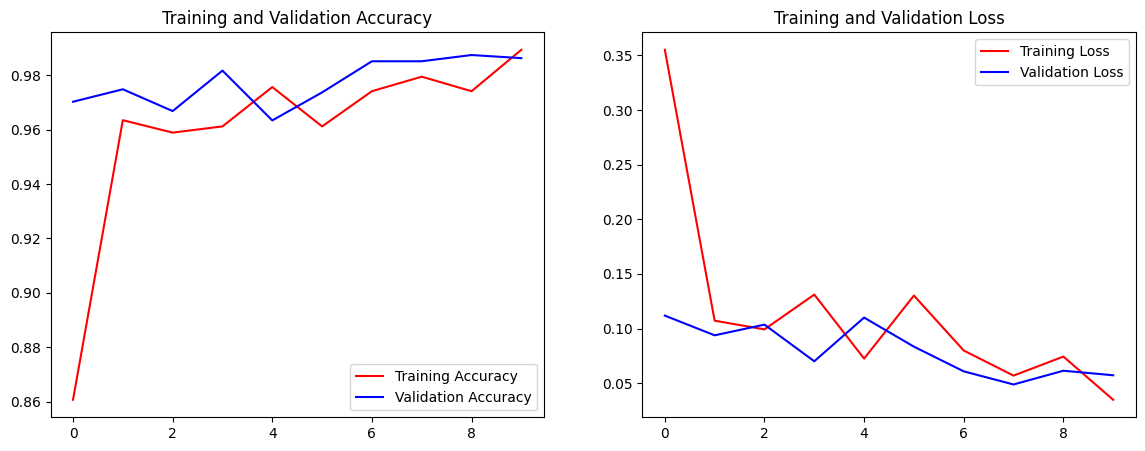

In [25]:
eval_plot(history_inception)

In [26]:
evaluate(model_inception)

Found 874 images belonging to 3 classes.


C:\Users\mrymf\AppData\Local\Temp\ipykernel_4668\1550550864.py:17: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  Y_pred = model.predict_generator(validation_generator, num_of_test_samples // batch_size+1)



Confusion Matrix

[[279   2   3]
 [  2 288   0]
 [  5   0 295]]


Classification Report

              precision    recall  f1-score   support

        Rock       0.98      0.98      0.98       284
       Paper       0.99      0.99      0.99       290
    Scissors       0.99      0.98      0.99       300

    accuracy                           0.99       874
   macro avg       0.99      0.99      0.99       874
weighted avg       0.99      0.99      0.99       874



Predicting new image

Based on model accuracy, we will use ResNet50V2 model to predict new image as it has the highest accuracy compared to CNN and InceptionV3.

In [27]:
def predict_image(image_upload, model = model_resnet):
  im = image_upload
  im_array = np.asarray(im)
  im_array = im_array*(1/225)
  im_input = tf.reshape(im_array, shape = [1, 100, 150, 3])

  predict_proba = sorted(model.predict(im_input)[0])[2]
  predict_class = np.argmax(model.predict(im_input))

  if predict_class == 0:
      predict_label = 'Paper'
  elif predict_class == 1:
      predict_label = 'Rock'
  else:
      predict_label = 'Scissor'

  print('\n')
  plt.show()
  print("\nImage prediction result: ", predict_label)
  print("Probability: ", round(predict_proba*100,2), "%")
  print('\n')

1/1 [==============================] - 0s 20ms/step




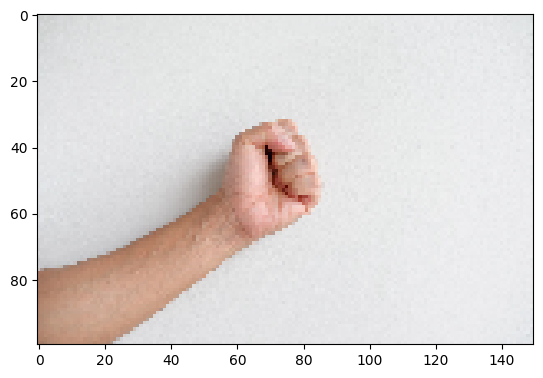


Image prediction result:  Paper
Probability:  98.49 %


1/1 [==============================] - 0s 15ms/step




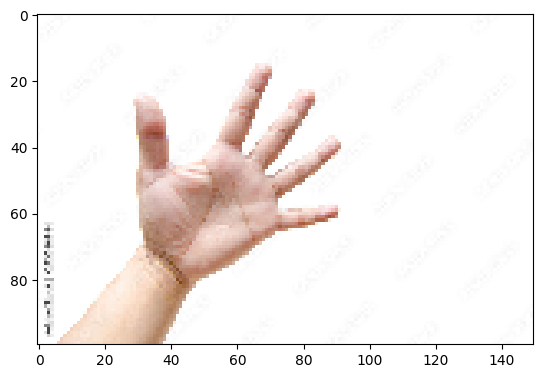


Image prediction result:  Paper
Probability:  99.28 %


1/1 [==============================] - 0s 14ms/step




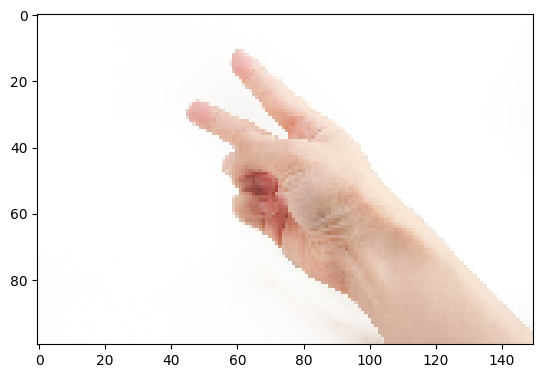


Image prediction result:  Paper
Probability:  99.53 %


1/1 [==============================] - 0s 18ms/step




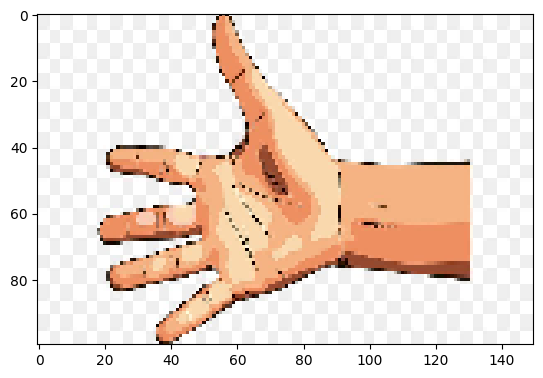


Image prediction result:  Paper
Probability:  99.11 %


1/1 [==============================] - 0s 18ms/step




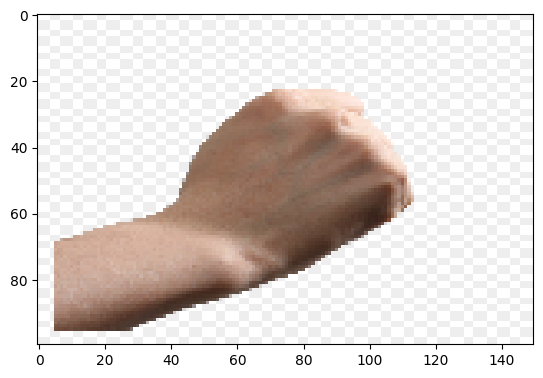


Image prediction result:  Paper
Probability:  99.95 %


1/1 [==============================] - 0s 17ms/step




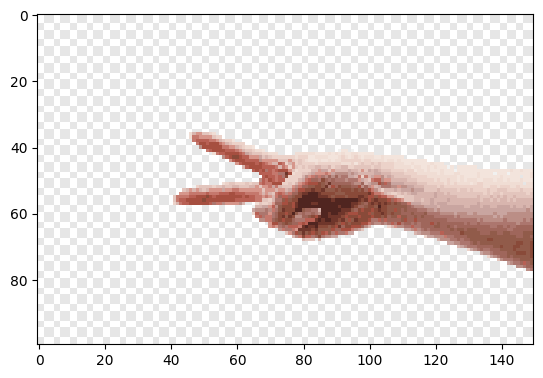


Image prediction result:  Paper
Probability:  99.35 %


1/1 [==============================] - 0s 16ms/step




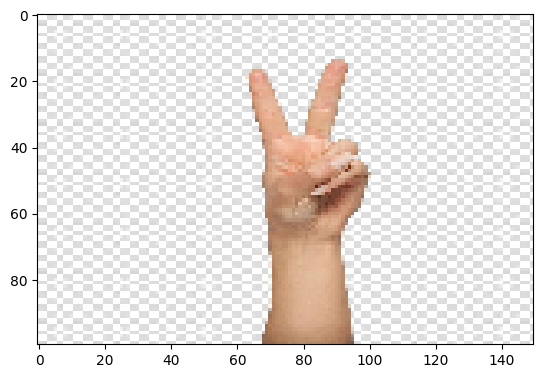


Image prediction result:  Paper
Probability:  99.47 %


1/1 [==============================] - 0s 16ms/step




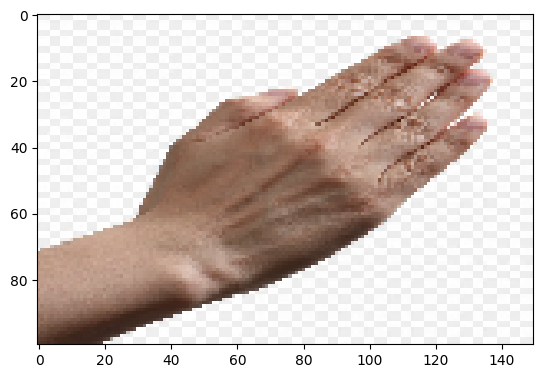


Image prediction result:  Paper
Probability:  99.92 %




In [34]:
files = ["./test_1.jpg", "./test_2.jpg", "./test_3.jpg", "./test_4.jpg", "./test_5.png", "./test_6.png", "./test_7.jpg", "./test_8.jpg", ]
for fn in files:
  path = fn
  img = image.load_img(path, target_size=(100,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  img = np.vstack([x])
  predict_image(img, model=model)

In [31]:
model_name = 'rock_paper_scissors_cnn_searched.h5'
model.save(model_name, save_format='h5')

d:\hasan\MyChannels\developer compass\codes\rps\rps_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [32]:
model_name = 'rock_paper_scissors_cnn_resnet.h5'
model_resnet.save(model_name, save_format='h5')

d:\hasan\MyChannels\developer compass\codes\rps\rps_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [33]:
model_name = 'rock_paper_scissors_cnn_inception.h5'
model_inception.save(model_name, save_format='h5')

d:\hasan\MyChannels\developer compass\codes\rps\rps_env\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
